Team mate's name - Guneet Chatha.

In [192]:
# Importing election tweets csv file and creating a dataframe.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tweet_data = pd.read_csv("us_election_tweets.csv", low_memory = False)
del tweet_data['Unnamed: 0'] # Redundant column which had index numbers.
tweet_data['tweet'] = tweet_data['tweet'].astype('string')
tweet_data = tweet_data.dropna(subset = ['tweet']) #There were some NoneType objects in the column which were not iterable; so removed them.

tweet_data
#tweet_data.info()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,likes_count,link,retweet,quote_url,video,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.32E+18,1.32E+18,2020-10-28 19:32:28 IST,10/28/2020,19:32:28,530,6.066668e+07,mcflyroro,Róisín ❤️,NaN,...,0.0,https://twitter.com/mcflyroro/status/132145227...,NaN,https://twitter.com/niallofficial/status/13214...,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1.32E+18,1.32E+18,2020-10-28 19:32:10 IST,10/28/2020,19:32:10,530,1.865321e+08,omar_allam_,Omar Allam,NaN,...,0.0,https://twitter.com/Omar_Allam_/status/1321452...,NaN,NaN,0.0,"{'user_id': '344254333', 'username': 'armstron...",NaN,NaN,NaN,NaN
2,1.32E+18,1.32E+18,2020-10-28 19:32:06 IST,10/28/2020,19:32:06,530,9.150331e+08,bogwollox,J L,NaN,...,0.0,https://twitter.com/Bogwollox/status/132145218...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1.32E+18,1.32E+18,2020-10-28 19:32:05 IST,10/28/2020,19:32:05,530,4.965621e+07,ejbeals,Emma Beals,NaN,...,1.0,https://twitter.com/ejbeals/status/13214521782...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1.32E+18,1.32E+18,2020-10-28 19:32:01 IST,10/28/2020,19:32:01,530,4.081098e+08,pinkladyh,Miss Old Soul,NaN,...,0.0,https://twitter.com/PinkLadyH/status/132145216...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128148,1.30E+18,1.30E+18,2020-08-24 20:04:20 IST,8/24/2020,20:04:20,530,3.486741e+07,tuffdoug,♈️🇨🇦 Big D. 6%🇨🇦🏴󠁧󠁢󠁳󠁣󠁴󠁿,NaN,...,0.0,https://twitter.com/tuffdoug/status/1297905084...,NaN,NaN,0.0,"{'user_id': '2791988124', 'username': 'MaximeB...",NaN,NaN,NaN,NaN
128149,1.30E+18,1.30E+18,2020-08-24 20:02:08 IST,8/24/2020,20:02:08,530,3.131530e+09,lsw12612672511,LSW1,NaN,...,1.0,https://twitter.com/LSW12612672511/status/1297...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
128150,1.30E+18,1.30E+18,2020-08-24 20:01:58 IST,8/24/2020,20:01:58,530,1.050000e+18,sciencenotdogma,ꜱᴄɪᴇɴᴄᴇ ɴᴏᴛ ᴅᴏɢᴍᴀ™ 🖖🏿🔬🌱🌊,NaN,...,12.0,https://twitter.com/ScienceNotDogma/status/129...,NaN,https://twitter.com/BernieSanders/status/12975...,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
128151,1.30E+18,1.30E+18,2020-08-24 19:59:37 IST,8/24/2020,19:59:37,530,4.828859e+07,pnarbradford,Pnar Bradford,NaN,...,0.0,https://twitter.com/PnarBradford/status/129790...,NaN,NaN,0.0,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


In [193]:
# Code for converting tweets to lowercase.

def lower_tweet(tw):
    return tw.lower()

tweet_data['tweet'] = tweet_data['tweet'].apply(lower_tweet)

tweet_data['tweet']

0         hi if you want americans to infuriate you in t...
1         @armstrongcbc no surprise. it's going to be a ...
2         i can’t wait till after the us election so i c...
3         america as a foreign country, by foreign corre...
4         wow. i guess if you want actual journalism and...
                                ...                        
128148    @maximebernier this setting the table for the ...
128149    donald trump seeks fast-track approval of oxfo...
128150    this is what we need daily in the media, folks...
128151    he can get it inject to himself rush delivered...
128152    as expected: “trump considers fast-tracking uk...
Name: tweet, Length: 128150, dtype: object

In [194]:
# Code for removing punctuations from all tweets.

cleaned_tweets = []
def clean_data(tw):
    punc = '''!()-[]{};:'"\“”’,<>./?@$%^&*_~'''
    for c in tw:
        if c == '#':
            tw = tw.replace(c, ' ')
        elif c in punc:
            tw = tw.replace(c, '')
    return(tw)

tweet_data['tweet'] = tweet_data['tweet'].apply(clean_data)
cleaned_tweets = tweet_data['tweet']

cleaned_tweets

0         hi if you want americans to infuriate you in t...
1         armstrongcbc no surprise its going to be a vol...
2         i cant wait till after the us election so i ca...
3         america as a foreign country by foreign corres...
4         wow i guess if you want actual journalism and ...
                                ...                        
128148    maximebernier this setting the table for the u...
128149    donald trump seeks fasttrack approval of oxfor...
128150    this is what we need daily in the media folks ...
128151    he can get it inject to himself rush delivered...
128152    as expected trump considers fasttracking uk co...
Name: tweet, Length: 128150, dtype: object

In [195]:
# Code for removing stop words from all tweets.

stop_words_df = pd.read_csv("stop_words.txt", header = None)
stop_words_df[0] = stop_words_df[0].apply(clean_data)
stop_words = stop_words_df[0].tolist()
temp = []
def remove_stop_words(tw):
    stopWords_removed_tweet = ''
    tw = tw.split()
    for word in tw:
        if word not in stop_words:
            temp.append(word)
    stopWords_removed_tweet = ' '.join(temp) 
    temp.clear()
    return(stopWords_removed_tweet)

tweet_data['keywords_tweet'] = tweet_data['tweet'].apply(remove_stop_words)

tweet_data[['tweet', 'keywords_tweet']]

,tweet,keywords_tweet
0,hi if you want americans to infuriate you in t...,americans infuriate comments realise vote elec...
1,armstrongcbc no surprise its going to be a vol...,armstrongcbc surprise going volatile weeks mar...
2,i cant wait till after the us election so i ca...,wait till election fun trump supporters remind...
3,america as a foreign country by foreign corres...,america foreign country foreign correspondents...
4,wow i guess if you want actual journalism and ...,wow guess actual journalism real coverage elec...
...,...,...
128148,maximebernier this setting the table for the u...,maximebernier setting table election rigging c...
128149,donald trump seeks fasttrack approval of oxfor...,donald trump seeks fasttrack approval oxford c...
128150,this is what we need daily in the media folks ...,daily media folks climatecrisis front center d...
128151,he can get it inject to himself rush delivered...,inject rush delivered vaccines dangerous deadl...


In [196]:
# Code for counting the number of times each word appears in each tweet.

stopWords_removed_twlist = tweet_data['keywords_tweet'].tolist()
word_count = {}
master_word_count = {}
def bag_of_words(tw):
    word_count.clear()
    tw = tw.split()
    for word in set(tw):
        word_count[word] = tw.count(word)
    return word_count

for i in range(0, len(stopWords_removed_twlist)):
    master_word_count[i] = {}
    master_word_count[i].update(bag_of_words(stopWords_removed_twlist[i]))

master_word_count

{0: {'vote': 1,
  'comments': 1,
  'britain': 1,
  'election': 1,
  'thread': 1,
  'realise': 1,
  'americans': 1,
  'infuriate': 1,
  'ireland': 1},
 1: {'market': 1,
  'weeks': 1,
  'going': 1,
  'lot': 1,
  'armstrongcbc': 1,
  'uselection': 1,
  'volatile': 1,
  'earnings': 1,
  'surprise': 1},
 2: {'trump': 2,
  'till': 1,
  'supporters': 1,
  'remind': 1,
  'election': 1,
  'wait': 1,
  'day': 1,
  'fun': 1,
  'loser': 1},
 3: {'correspondents': 1,
  'america': 1,
  'election': 1,
  'covering': 1,
  'httpstcodkz0gmdm5g': 1,
  'foreign': 2,
  'country': 1},
 4: {'wow': 1,
  'guess': 1,
  'coverage': 1,
  'point': 1,
  'httpstcofpjrfwc02s': 1,
  'watching': 1,
  'election': 1,
  'blind': 1,
  'going': 1,
  'actual': 1,
  'facts': 1,
  'biased': 1,
  'skynewsaust': 1,
  'journalism': 1,
  'real': 1,
  'start': 1,
  'media': 1},
 5: {'feel': 1,
  'googlenews': 1,
  'election': 1,
  'httpstcora2zeqivuu': 1,
  'guardian': 1,
  'polarized': 1,
  'rest': 1},
 6: {'🔥': 2,
  'forex': 1,
  

In [197]:
# Code for finding out which tweet relates to which candidate, Trump or Biden or both.

import re
def candidate_relation(tw):
    if bool(re.search("(?=.*(donald|trump))(?=.*(joe|biden))", tw)) == True:
        return("TB")
    elif bool(re.search("trump|donald", tw)) == True:
        return("T")
    elif bool(re.search("biden|joe", tw)) == True:
        return("B")
    else:
        return("None")

tweet_data['candidate_relation'] = tweet_data['keywords_tweet'].apply(candidate_relation)

tweet_data[['keywords_tweet', 'candidate_relation']]

,keywords_tweet,candidate_relation
0,americans infuriate comments realise vote elec...,None
1,armstrongcbc surprise going volatile weeks mar...,None
2,wait till election fun trump supporters remind...,T
3,america foreign country foreign correspondents...,None
4,wow guess actual journalism real coverage elec...,None
...,...,...
128148,maximebernier setting table election rigging c...,None
128149,donald trump seeks fasttrack approval oxford c...,T
128150,daily media folks climatecrisis front center d...,None
128151,inject rush delivered vaccines dangerous deadl...,T


In [198]:
# Code for creating a dictionary of keywords and their scores.

corpus_df = pd.read_csv("corpus.txt", header = None, delimiter = "\t")
corpus_df.set_index(0, drop = True, inplace = True)
corpus_dict = corpus_df.to_dict()[1]

corpus_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [199]:
# Code for calculating tweet scores.

def tweet_score(tw):
    tw = tw.split()
    tscore = 0
    for word in tw:
        if word in corpus_dict:
            word_score = corpus_dict.get(word)
            tscore = tscore + word_score
    return(tscore)

tweet_data['raw_score'] = tweet_data['keywords_tweet'].apply(tweet_score)

tweet_data[['tweet', 'keywords_tweet', 'raw_score']]

,tweet,keywords_tweet,raw_score
0,hi if you want americans to infuriate you in t...,americans infuriate comments realise vote elec...,-2
1,armstrongcbc no surprise its going to be a vol...,armstrongcbc surprise going volatile weeks mar...,0
2,i cant wait till after the us election so i ca...,wait till election fun trump supporters remind...,2
3,america as a foreign country by foreign corres...,america foreign country foreign correspondents...,0
4,wow i guess if you want actual journalism and ...,wow guess actual journalism real coverage elec...,1
...,...,...,...
128148,maximebernier this setting the table for the u...,maximebernier setting table election rigging c...,1
128149,donald trump seeks fasttrack approval of oxfor...,donald trump seeks fasttrack approval oxford c...,2
128150,this is what we need daily in the media folks ...,daily media folks climatecrisis front center d...,-1
128151,he can get it inject to himself rush delivered...,inject rush delivered vaccines dangerous deadl...,0


In [200]:
# Tweet with the lowest raw score is given a scaled score of 0 and highest tweet score 1; every other tweet score is converted to a score between 0 and 1.

minScore = min(tweet_data['raw_score'])
maxScore = max(tweet_data['raw_score'])
def scaled_score(value):
    scScore = 0
    scScore = (value - minScore) / (maxScore - minScore)
    return(scScore)

tweet_data['scaled_score'] = tweet_data['raw_score'].apply(scaled_score)

tweet_data[['tweet', 'keywords_tweet', 'raw_score', 'scaled_score']]

,tweet,keywords_tweet,raw_score,scaled_score
0,hi if you want americans to infuriate you in t...,americans infuriate comments realise vote elec...,-2,0.451613
1,armstrongcbc no surprise its going to be a vol...,armstrongcbc surprise going volatile weeks mar...,0,0.483871
2,i cant wait till after the us election so i ca...,wait till election fun trump supporters remind...,2,0.516129
3,america as a foreign country by foreign corres...,america foreign country foreign correspondents...,0,0.483871
4,wow i guess if you want actual journalism and ...,wow guess actual journalism real coverage elec...,1,0.500000
...,...,...,...,...
128148,maximebernier this setting the table for the u...,maximebernier setting table election rigging c...,1,0.500000
128149,donald trump seeks fasttrack approval of oxfor...,donald trump seeks fasttrack approval oxford c...,2,0.516129
128150,this is what we need daily in the media folks ...,daily media folks climatecrisis front center d...,-1,0.467742
128151,he can get it inject to himself rush delivered...,inject rush delivered vaccines dangerous deadl...,0,0.483871


In [201]:
#This code creates a subset of the orginal dataframe required for analysis.

sa_df = tweet_data[['date', 'username', 'tweet', 'keywords_tweet', 'candidate_relation', 'raw_score', 'scaled_score']]
sa_df.reset_index(inplace = True, drop = True)

sa_df['date'] = pd.to_datetime(sa_df['date'])
sa_df['candidate_relation'] = sa_df['candidate_relation'].astype('category')
sa_df['username'] = sa_df['username'].astype('string')
sa_df['tweet'] = sa_df['tweet'].astype('string')
sa_df['keywords_tweet'] = sa_df['keywords_tweet'].astype('string')

sa_df

<ipython-input-201-621d05e0ab5a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_df['date'] = pd.to_datetime(sa_df['date'])
<ipython-input-201-621d05e0ab5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_df['candidate_relation'] = sa_df['candidate_relation'].astype('category')
<ipython-input-201-621d05e0ab5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,date,username,tweet,keywords_tweet,candidate_relation,raw_score,scaled_score
0,2020-10-28,mcflyroro,hi if you want americans to infuriate you in t...,americans infuriate comments realise vote elec...,None,-2,0.451613
1,2020-10-28,omar_allam_,armstrongcbc no surprise its going to be a vol...,armstrongcbc surprise going volatile weeks mar...,None,0,0.483871
2,2020-10-28,bogwollox,i cant wait till after the us election so i ca...,wait till election fun trump supporters remind...,T,2,0.516129
3,2020-10-28,ejbeals,america as a foreign country by foreign corres...,america foreign country foreign correspondents...,None,0,0.483871
4,2020-10-28,pinkladyh,wow i guess if you want actual journalism and ...,wow guess actual journalism real coverage elec...,None,1,0.500000
...,...,...,...,...,...,...,...
128145,2020-08-24,tuffdoug,maximebernier this setting the table for the u...,maximebernier setting table election rigging c...,None,1,0.500000
128146,2020-08-24,lsw12612672511,donald trump seeks fasttrack approval of oxfor...,donald trump seeks fasttrack approval oxford c...,T,2,0.516129
128147,2020-08-24,sciencenotdogma,this is what we need daily in the media folks ...,daily media folks climatecrisis front center d...,None,-1,0.467742
128148,2020-08-24,pnarbradford,he can get it inject to himself rush delivered...,inject rush delivered vaccines dangerous deadl...,T,0,0.483871


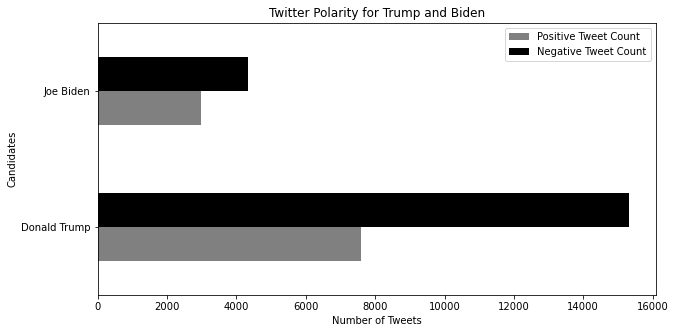

In [211]:
# Code for plotting histogram of polarity values for Donald Trump.

trump_pos_tweet_count = sa_df[(sa_df['raw_score'] > 0) & (sa_df['candidate_relation'] == 'T')]['raw_score'].count()
trump_neg_tweet_count = sa_df[(sa_df['raw_score'] <= 0) & (sa_df['candidate_relation'] == 'T')]['raw_score'].count()

biden_pos_tweet_count = sa_df[(sa_df['raw_score'] > 0) & (sa_df['candidate_relation'] == 'B')]['raw_score'].count()
biden_neg_tweet_count = sa_df[(sa_df['raw_score'] <= 0) & (sa_df['candidate_relation'] == 'B')]['raw_score'].count()

data = [['Donald Trump', trump_pos_tweet_count, trump_neg_tweet_count],
        ['Joe Biden', biden_pos_tweet_count, biden_neg_tweet_count]]
twitter_polarity_df = pd.DataFrame(data, columns = ['Candidates', 'Positive Tweet Count', 'Negative Tweet Count'])

twitter_polarity_df.plot(x = 'Candidates', kind = 'barh', figsize = (10, 5), color = ['grey', 'black'], title = 'Twitter Polarity for Trump and Biden')
plt.xlabel("Number of Tweets")
plt.show()

The above figure shows twitter polarity (positive/negative tweet distribution) for Donald Trump and Joe Biden in the form of a bar graph. This graph is plotted by counting only those tweets where candidate_relation = either 'T' or 'B'; we have ignored the tweets with 'None' and 'TB'.

There are total 7,312 tweets where only Joe Biden's name appeared. Out of those, 2,966 (40.56%) tweets were analysed as positive, and 4,346 (59.4%) are found to be negative for Biden.

On the other hand, Donald Trumps' name appeared in 22,909 tweets; out of which only 7,587 (33.11%) are positive and 15,322 (66.8%) are negative towards him.

In [212]:
# Estimation of supporters for each candidate among twitter users.

total_twitter_users = sa_df.username.nunique()
trump_supporters = (sa_df[(sa_df['raw_score'] > 0) & (sa_df['candidate_relation'] == 'T')][['username']]).nunique().item()
biden_supporters = (sa_df[(sa_df['raw_score'] > 0) & (sa_df['candidate_relation'] == 'B')][['username']]).nunique().item()

For the sake of above calculation of supporters, we have considered a twitter user as a supporter of a candidate if his/her tweet has a raw score > 0 and candidate relation equal to either 'T' or 'B'.

Total Twitter users in this dataset = 80,415 <br>                                                                          Total Trump supporters (considering above conditions) = 6,428 <br>
Total Biden supporters (considering above conditions) = 2,642

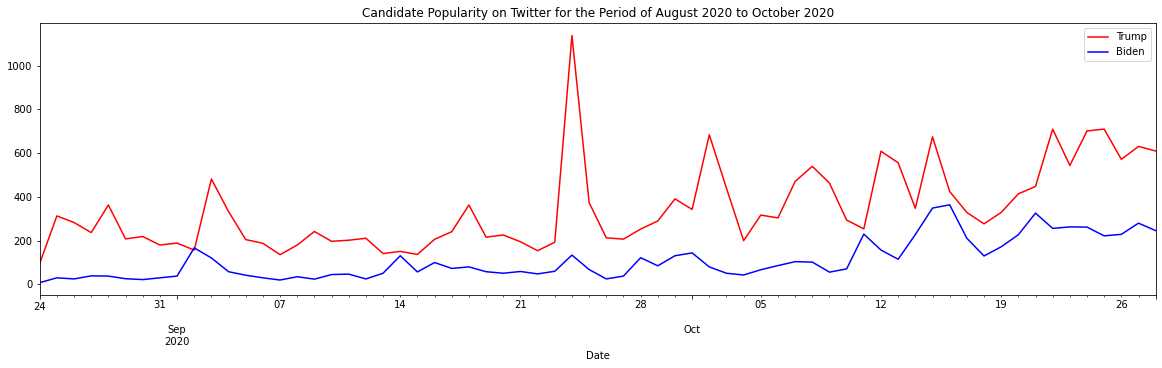

In [213]:
# Analyzing popularity of each candidate throughout the two months period using Time Series of Pandas.
# We have plotted a graph of the number of tweets for each candidate on each day during the 2 months.

popularity_df = sa_df[(sa_df['candidate_relation'] == 'T')][['date', 'candidate_relation']]
popularity_df = popularity_df.groupby('date').count()
popularity_df.reset_index(inplace = True)

temp_df = (sa_df[(sa_df['candidate_relation'] == 'B')][['date', 'candidate_relation']]).groupby('date').count()
temp_df.reset_index(inplace = True)

popularity_df['Biden'] = temp_df['candidate_relation']
popularity_df.rename(columns = {"candidate_relation":"Trump", "date":"Date"}, inplace = True)

popularity = pd.Series(data = popularity_df['Trump'].values, index = popularity_df['Date'])
popularity.plot(figsize = (20, 5), color = 'r', label = 'Trump', legend = True)

popularity = pd.Series(data = popularity_df['Biden'].values, index = popularity_df['Date'])
popularity.plot(figsize = (20, 5), color = 'b', label = 'Biden', title = 'Candidate Popularity on Twitter for the Period of August 2020 to October 2020', legend = True)

plt.show()

For the above time series calculation, we have taken into account only those tweets which have a candidate_relation equal to either 'T' or 'B'. <br>

Donald Trump's overall popularity has increased from August 2020 to October 2020 after several ups and downs in between these two months. On 24th September, his popularity was the highest with the number of tweets mentioning him was above 1000. <br>

On the other hand, Biden's popularity has also increased slightly compared to what it was at the start of August 2020. <br>

Overall, Trump has been the popular candidate over Biden throughout the two months period.

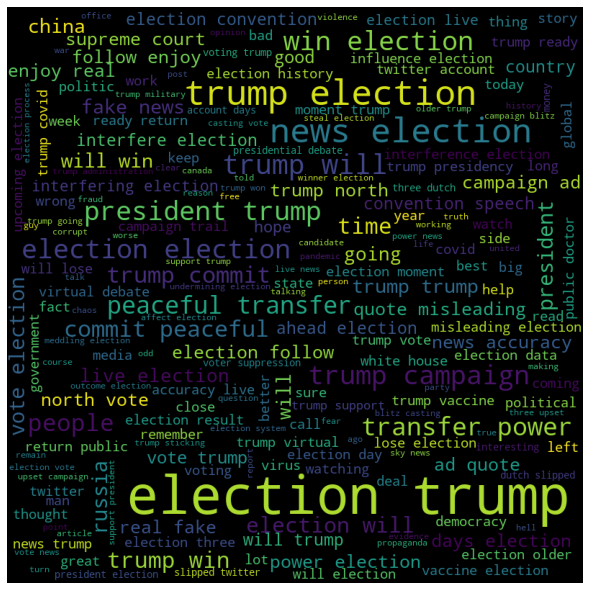

In [214]:
# Wordcloud for Trump using keywords of tweets that mentioned only his name.

from wordcloud import WordCloud
from nltk.corpus import words
  
trump_words = ''
d = dict.fromkeys(words.words(), None)
for s in sa_df[sa_df['candidate_relation'] == 'T']['keywords_tweet']:
    s = s.split()
    for word in s:
        if word in d:
            trump_words += word + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', min_font_size = 10).generate(trump_words) 
                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

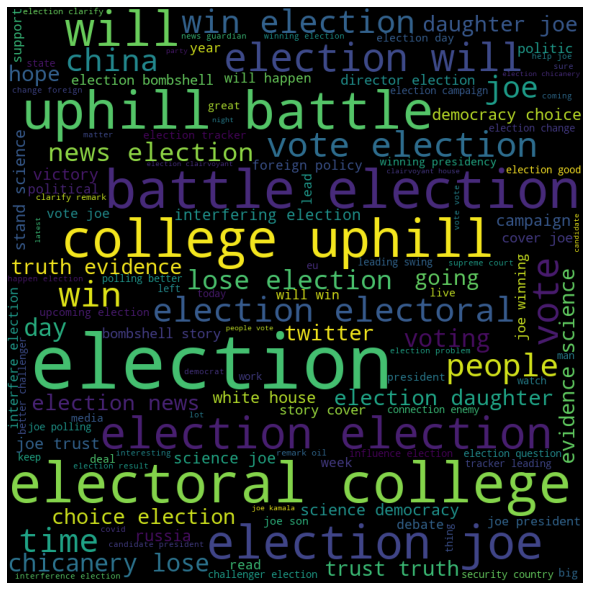

In [215]:
# Wordcloud for Biden using keywords of tweets that mentioned only his name.

biden_words = ''
d = dict.fromkeys(words.words(), None)
for s in sa_df[sa_df['candidate_relation'] == 'B']['keywords_tweet']:
    s = s.split()
    for word in s:
        if word in d:
            biden_words += word + ' ' 

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', min_font_size = 10).generate(biden_words) 
                          
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()